Initial Data Snapshot:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0

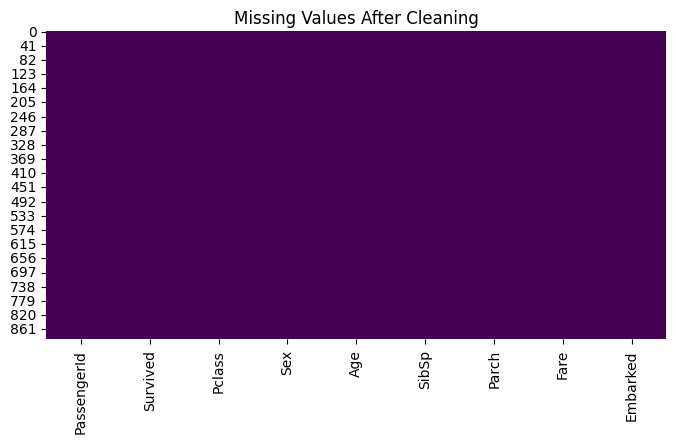

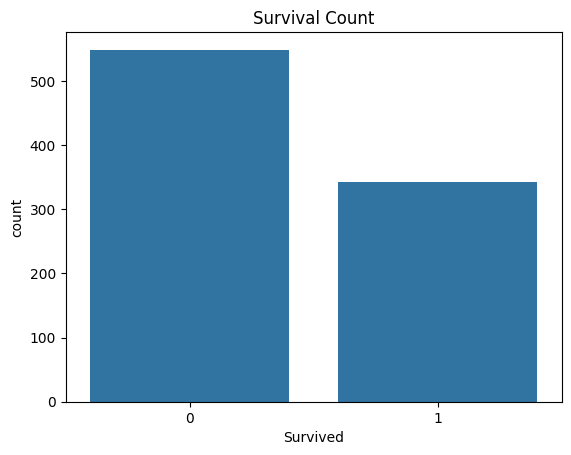

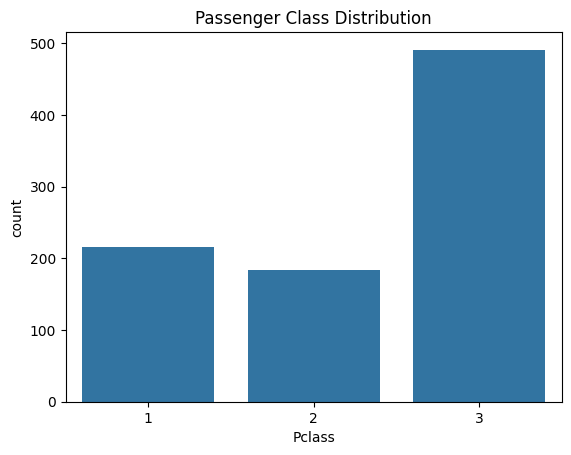

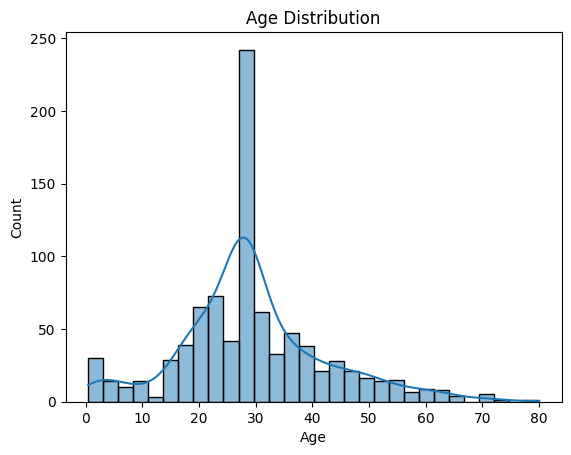

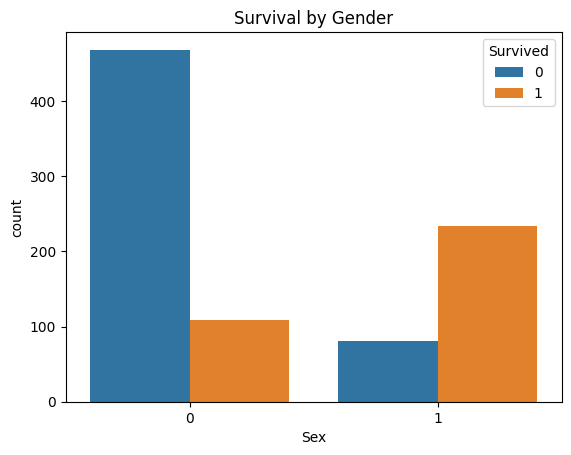

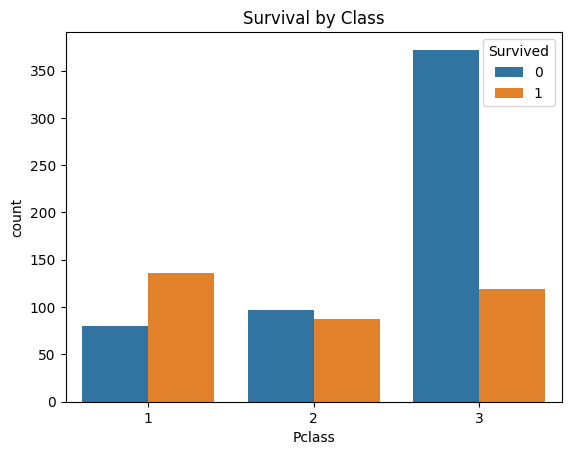

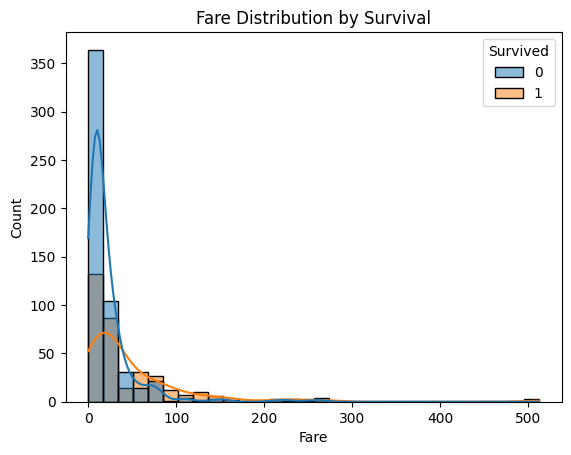

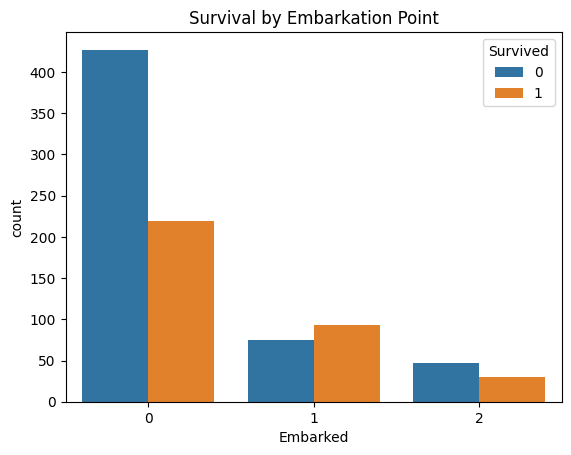

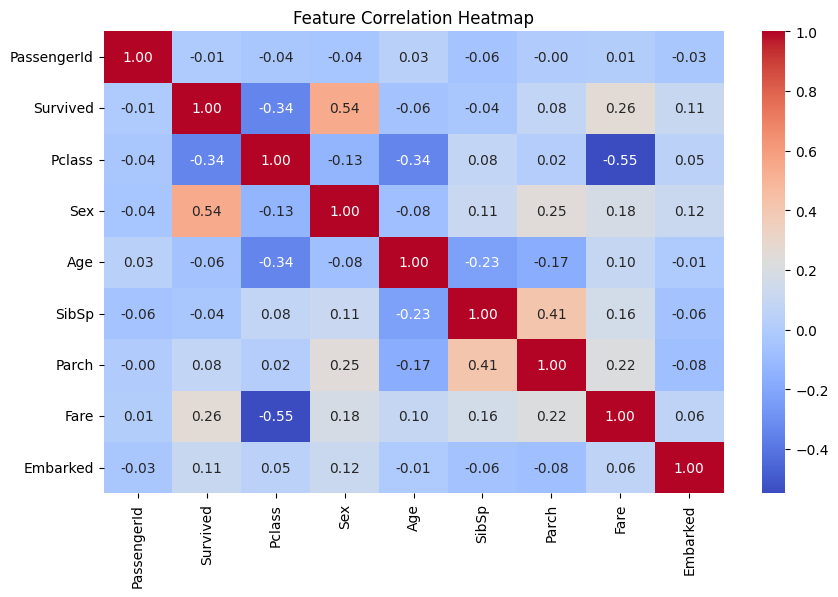

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Titanic dataset from URL
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Step 3: View basic structure
print("Initial Data Snapshot:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Step 4: Data Cleaning
# Drop columns with too many missing or less useful data
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# Fill missing Age with median (future-proof)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode (future-proof)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Step 5: Convert categorical variables to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Step 6: Check for missing values (visualization)
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values After Cleaning")
plt.show()

# Step 7: EDA – Univariate Plots
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

sns.countplot(data=df, x='Pclass')
plt.title("Passenger Class Distribution")
plt.show()

sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Step 8: EDA – Bivariate Plots
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Class")
plt.show()

sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title("Fare Distribution by Survival")
plt.show()

sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title("Survival by Embarkation Point")
plt.show()

# Step 9: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
